# Q) Prepare a classification model using Naive Bayes for salary data 

Data Description:

age -- age of a person

workclass	-- A work class is a grouping of work 

education	-- Education of an individuals	

maritalstatus -- Marital status of an individulas	

occupation	 -- occupation of an individuals

relationship -- 	

race --  Race of an Individual

sex --  Gender of an Individual

capitalgain --  profit received from the sale of an investment	


capitalloss	-- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week	

native -- Native of an individual

Salary -- salary of an individual

In [80]:
# Import Necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings('ignore')

In [81]:
train_data = pd.read_csv(r"C:\Users\shrut\Downloads\SalaryData_Train.csv")
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [82]:
test_data = pd.read_csv(r"C:\Users\shrut\Downloads\SalaryData_Test.csv")
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [83]:
train_test_data = pd.merge(test_data,train_data)
train_test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,43,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
1,43,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
2,37,Private,HS-grad,9,Widowed,Machine-op-inspct,Unmarried,White,Female,0,0,20,United-States,<=50K
3,25,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
4,25,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K


# EDA

For Train Data :

In [84]:
train_data.shape

(30161, 14)

In [85]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [86]:
# Checking for NA values
train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [87]:
train_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [88]:
train_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

For Test Data :

In [89]:
test_data.shape

(15060, 14)

In [90]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [27]:
test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [28]:
test_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [29]:
test_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

Convert object to int :

In [30]:
le = LabelEncoder()

In [31]:
col1 = train_data.columns[train_data.dtypes == "object"]
col1

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [32]:
for i in col1:
    train_data[i] = le.fit_transform(train_data[i])

In [33]:
train_data.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

In [34]:
col2 = test_data.columns[test_data.dtypes == "object"]
col2

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [35]:
for i in col2:
    test_data[i] = le.fit_transform(test_data[i])

In [36]:
test_data.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

# Perform Assumption Check

For Train Data :

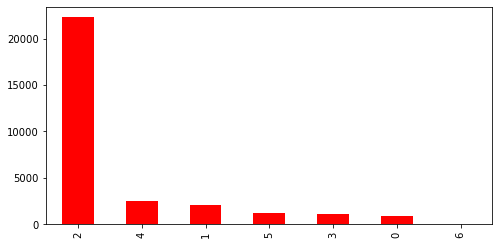

In [39]:
plt.figure(figsize = (8,4))
train_data.workclass.value_counts().plot.bar(color = 'red');

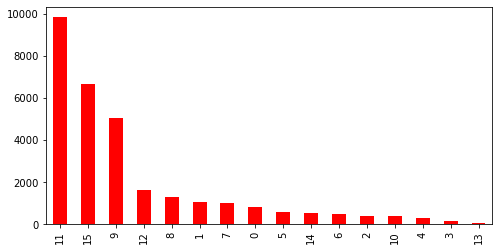

In [40]:
plt.figure(figsize = (8,4))
train_data.education.value_counts().plot.bar(color = 'red');

<AxesSubplot:>

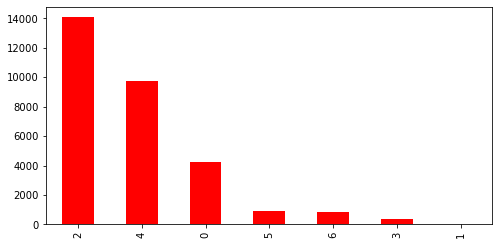

In [41]:
plt.figure(figsize = (8,4))
train_data.maritalstatus.value_counts().plot.bar(color = 'red')

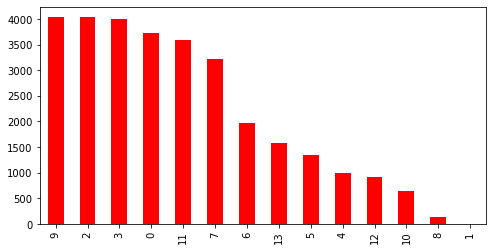

In [42]:
plt.figure(figsize = (8,4))
train_data.occupation.value_counts().plot.bar(color = 'red');

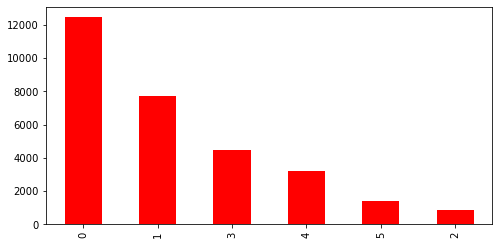

In [43]:
plt.figure(figsize = (8,4))
train_data.relationship.value_counts().plot.bar(color = 'red');

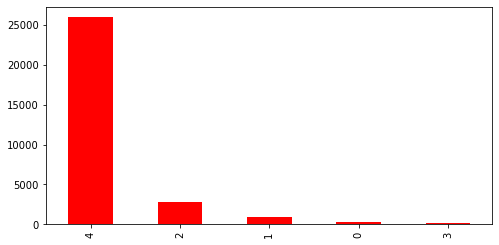

In [44]:
plt.figure(figsize = (8,4))
train_data.race.value_counts().plot.bar(color = 'red');

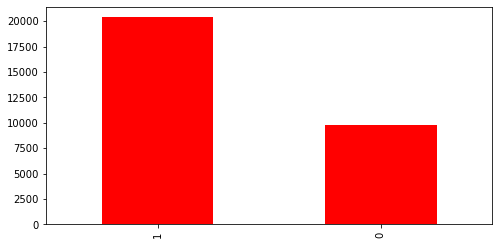

In [45]:
plt.figure(figsize = (8,4))
train_data.sex.value_counts().plot.bar(color = 'red');

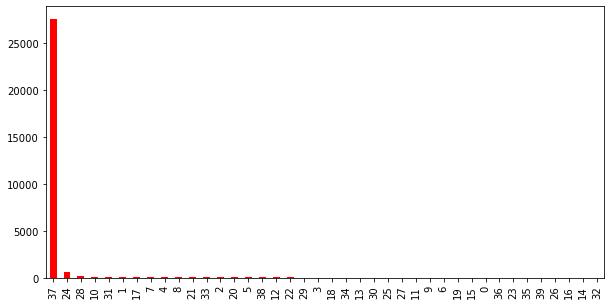

In [46]:
plt.figure(figsize = (10,5))
train_data.native.value_counts().plot.bar(color = 'red');

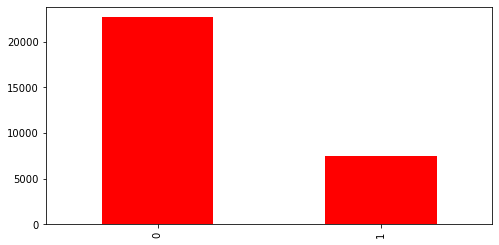

In [47]:
plt.figure(figsize = (8,4))
train_data.Salary.value_counts().plot.bar(color = 'red');

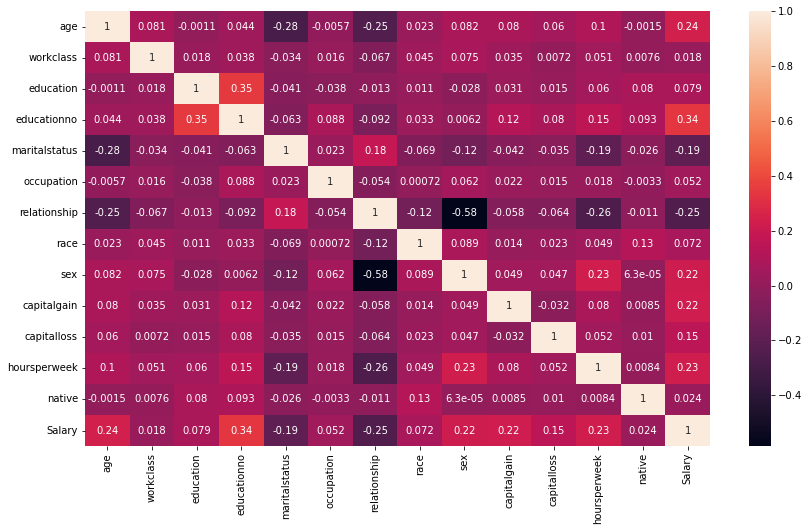

In [48]:
plt.figure(figsize = (14,8))
sns.heatmap(train_data.corr(),annot = True)
plt.show()

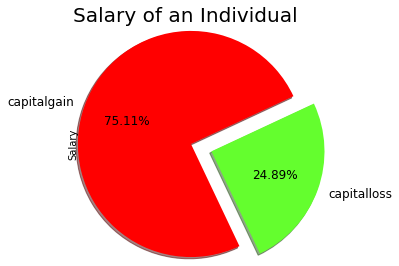

In [49]:
colors = ["#FF0000", "#64FE2E"]
labels ="capitalgain", "capitalloss"

plt.suptitle('Salary of an Individual', fontsize = 20)

train_data["Salary"].value_counts().plot.pie(explode = [0,0.25], autopct = '%1.2f%%',shadow = True, colors = colors,
                                             labels = labels, fontsize = 12, startangle = 25,radius = 1.3)
plt.show()

For Test Data :

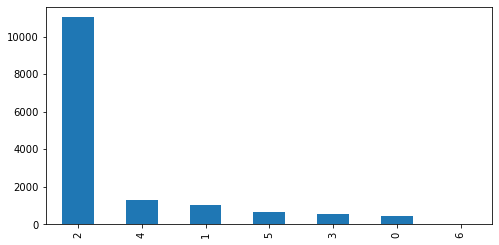

In [50]:
plt.figure(figsize = (8,4))
test_data.workclass.value_counts().plot.bar();

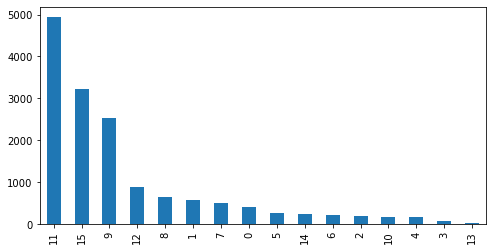

In [51]:
plt.figure(figsize = (8,4))
test_data.education.value_counts().plot.bar();

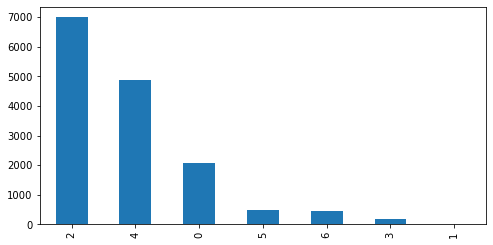

In [52]:
plt.figure(figsize = (8,4))
test_data.maritalstatus.value_counts().plot.bar();

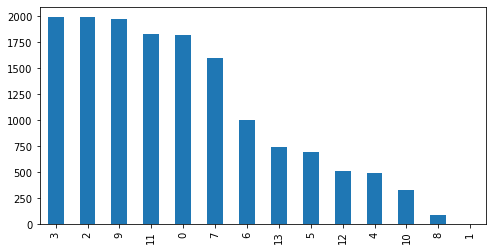

In [53]:
plt.figure(figsize = (8,4))
test_data.occupation.value_counts().plot.bar();

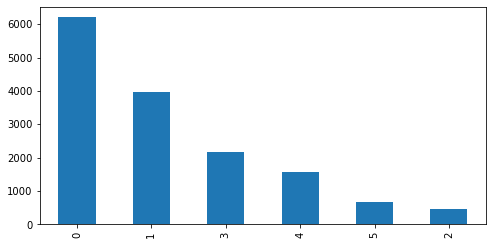

In [54]:
plt.figure(figsize = (8,4))
test_data.relationship.value_counts().plot.bar();

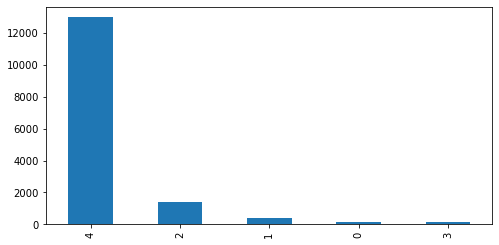

In [55]:
plt.figure(figsize = (8,4))
test_data.race.value_counts().plot.bar();

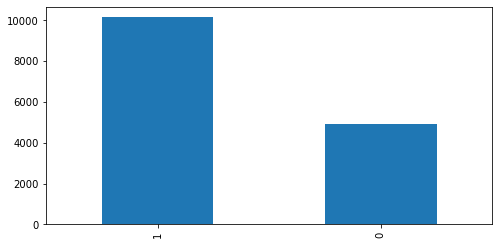

In [56]:
plt.figure(figsize = (8,4))
test_data.sex.value_counts().plot.bar();

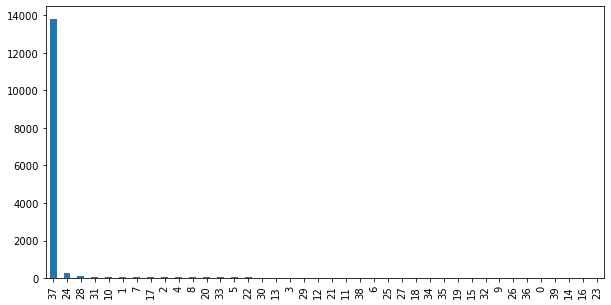

In [57]:
plt.figure(figsize = (10,5))
test_data.native.value_counts().plot.bar();

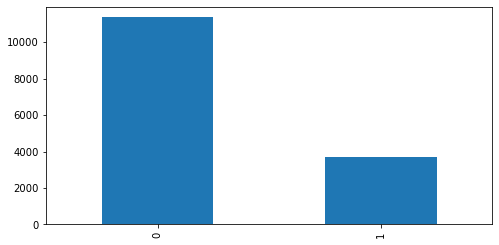

In [58]:
plt.figure(figsize = (8,4))
test_data.Salary.value_counts().plot.bar();

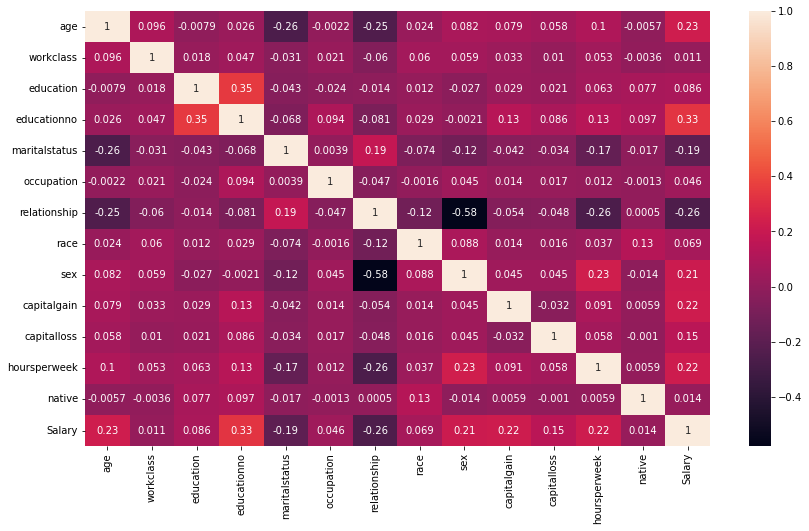

In [59]:
plt.figure(figsize = (14,8))
sns.heatmap(test_data.corr(),annot = True)
plt.show()

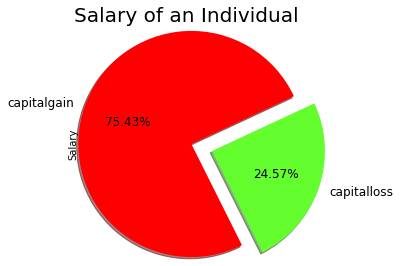

In [60]:
colors = ["#FF0000", "#64FE2E"]
labels ="capitalgain", "capitalloss"

plt.suptitle('Salary of an Individual', fontsize = 20)

test_data["Salary"].value_counts().plot.pie(explode = [0,0.25], autopct = '%1.2f%%',shadow = True, colors = colors,
                                             labels = labels, fontsize = 12, startangle = 25,radius = 1.3)
plt.show()

# Train Test split :

In [62]:
X_train = train_data.drop('Salary',axis = 1).values
y_train = train_data.Salary

In [63]:
X_test = test_data.drop('Salary',axis = 1).values
y_test = test_data.Salary

In [64]:
X_train.shape,X_test.shape

((30161, 13), (15060, 13))

In [65]:
y_test.shape,y_train.shape

((15060,), (30161,))

# Applying Gaussian Naive Bayes for Classification 

In [67]:
GNB_model = GaussianNB()

In [68]:
train_pred_gau = GNB_model.fit(X_train,y_train).predict(X_train)
train_pred_gau

array([0, 0, 0, ..., 0, 0, 1])

In [69]:
test_pred_gau = GNB_model.fit(X_train,y_train).predict(X_test)
test_pred_gau

array([0, 0, 0, ..., 0, 1, 0])

In [71]:
train_accuracy_gau = np.mean(train_pred_gau == y_train)
train_accuracy_gau
print('Training accuracy is',train_accuracy_gau,'.')

Training accuracy is 0.7953317197705646 .


In [73]:
test_accuracy_gau = np.mean(test_pred_gau == y_test)
test_accuracy_gau
print('Testing accuracy is',test_accuracy_gau,'.')

Testing accuracy is 0.7946879150066402 .


# Applying Multinomial Naive Bayes for Classification

In [75]:
MNB_model = MultinomialNB()

In [76]:
train_pred_multi = MNB_model.fit(X_train,y_train).predict(X_train)
train_pred_multi

array([1, 0, 0, ..., 0, 0, 1])

In [77]:
test_pred_multi = MNB_model.fit(X_train,y_train).predict(X_test)
test_pred_multi

array([0, 0, 0, ..., 0, 1, 0])

In [78]:
train_accuracy_multi = np.mean(train_pred_multi == y_train)
train_accuracy_multi
print('Training accuracy is',train_accuracy_multi,'.')

Training accuracy is 0.7729186698053778 .


In [79]:
test_accuracy_multi = np.mean(test_pred_multi == y_test)
test_accuracy_multi
print('Testing accuracy is',test_accuracy_multi,'.')

Testing accuracy is 0.7749667994687915 .


# Conclusion/Insights :

a) For Gaussian = Training accuracy : 0.7953317197705646

Testing accuracy : 0.7946879150066402

b) For Multinomial = Training accuracy : 0.7729186698053778

Testing accuracy : 0.7749667994687915

So we can see the model accuracy is best for Gaussian Naive Bayes algorithm.

Also, in Gaussian model the training-set accuracy score is 79.53% while the test-set accuracy to be 79.46%. These two values are quite comparable. So, there is no sign of overfitting.